# ENVIRONMENT

In [1]:
# basic environment and custom scripts
import os
import acquire
import prepare
import explore

# numpy and pandas for dataframe building and manipulation
import pandas as pd
import numpy as np
%matplotlib inline

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing for scaling and splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# xgboost for feature selection
import xgboost as xgb

# sklearn machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#  balanced bagging classifier
from imblearn.ensemble import BalancedBaggingClassifier

# to explode the DataFrames and avoid truncation
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# ACQUISITION

In [2]:
# utilize acquire script to get primary dataframe for analysis
df, dfb = acquire.get_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 44 columns):
CASEID      705 non-null int64
ABUSED      705 non-null int64
SCRSTATR    705 non-null int64
LENGTHC1    705 non-null int64
C1SITUAT    705 non-null int64
PABUSE      705 non-null int64
D3RCHILT    705 non-null int64
E13PRGNT    705 non-null int64
N7PREGNT    705 non-null int64
TOTSUPRT    705 non-null int64
G1NUMBER    705 non-null int64
H1JEALUS    705 non-null int64
H2LIMIT     705 non-null int64
H3KNOWNG    705 non-null int64
J1HIT       705 non-null int64
J2THROWN    705 non-null int64
J3PUSH      705 non-null int64
J4SLAP      705 non-null int64
J5KICK      705 non-null int64
J6OBJECT    705 non-null int64
J7BEAT      705 non-null int64
J8CHOKE     705 non-null int64
J9KNIFE     705 non-null int64
J10GUN      705 non-null int64
J11SEX      705 non-null int64
POWER       705 non-null int64
HARASS      705 non-null int64
B1AGE       705 non-null int64
AGEDISP     705 non-null in

## _'dfb' : this is the dataframe with the AW (Abused Woman) cases_

In [4]:
# placeholder cell: perhaps going to utilize these in a later phase

# df9 & 10 are cases of AW (Abused Woman)
df9 = acquire.read_data('data09.csv')
df10 = acquire.read_data('data10.csv')

# df 13, 14 & 15 are cases of HOMICIDE
df13 = acquire.read_data('data13.csv')
df14 = acquire.read_data('data14.csv')
df15 = acquire.read_data('data15.csv')

# PREPARATION

## _Examining the dataframes, dfa & dfb, for any missing or inconsistent values._

In [5]:
df.head()

,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,...,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE
0,108395,1,1,1,1,1,1,3,2,9,...,2,2,2,2,2,2,2,2,2,2
1,108397,1,1,2,1,1,0,3,3,11,...,2,1,2,1,1,1,1,2,1,1
2,108399,1,1,5,1,1,6,3,2,9,...,2,2,2,2,2,1,2,2,2,2
3,108443,1,1,2,1,1,0,1,2,12,...,2,1,2,2,1,1,2,1,2,2
4,108444,1,1,2,1,1,1,2,2,11,...,2,1,1,1,2,2,2,2,2,2


In [6]:
dfb.head()

,CASEID,M5FIRED,M11HIGH,M35SAFE,M41ILLGL,M42DAGRR,M13TALKR,M32OTHER,M27HOW,M30ARRES,...,FORCEDR,MISCARR,RESTRAIN,CHOKED,NDRUNK,RDRUNK,BOTHDRUN,NDRUGS,RDRUGS,BOTHDRUG
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,0,1,2,0,0,0,0,0
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,0,1,1,0,0,0,0,0,0
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,0,1,1,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,0,3,0,0,0,0,0


In [7]:
def plot_hist(df):
    """
    Plots the distribution of the dataframe's variables.
    """
    df.hist(figsize=(24, 20), bins=20)

In [8]:
# formally check that there are no nulls in dataframe
prepare.get_nulls_by_column(df)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [9]:
# check no 2
prepare.get_nulls_by_row(df)

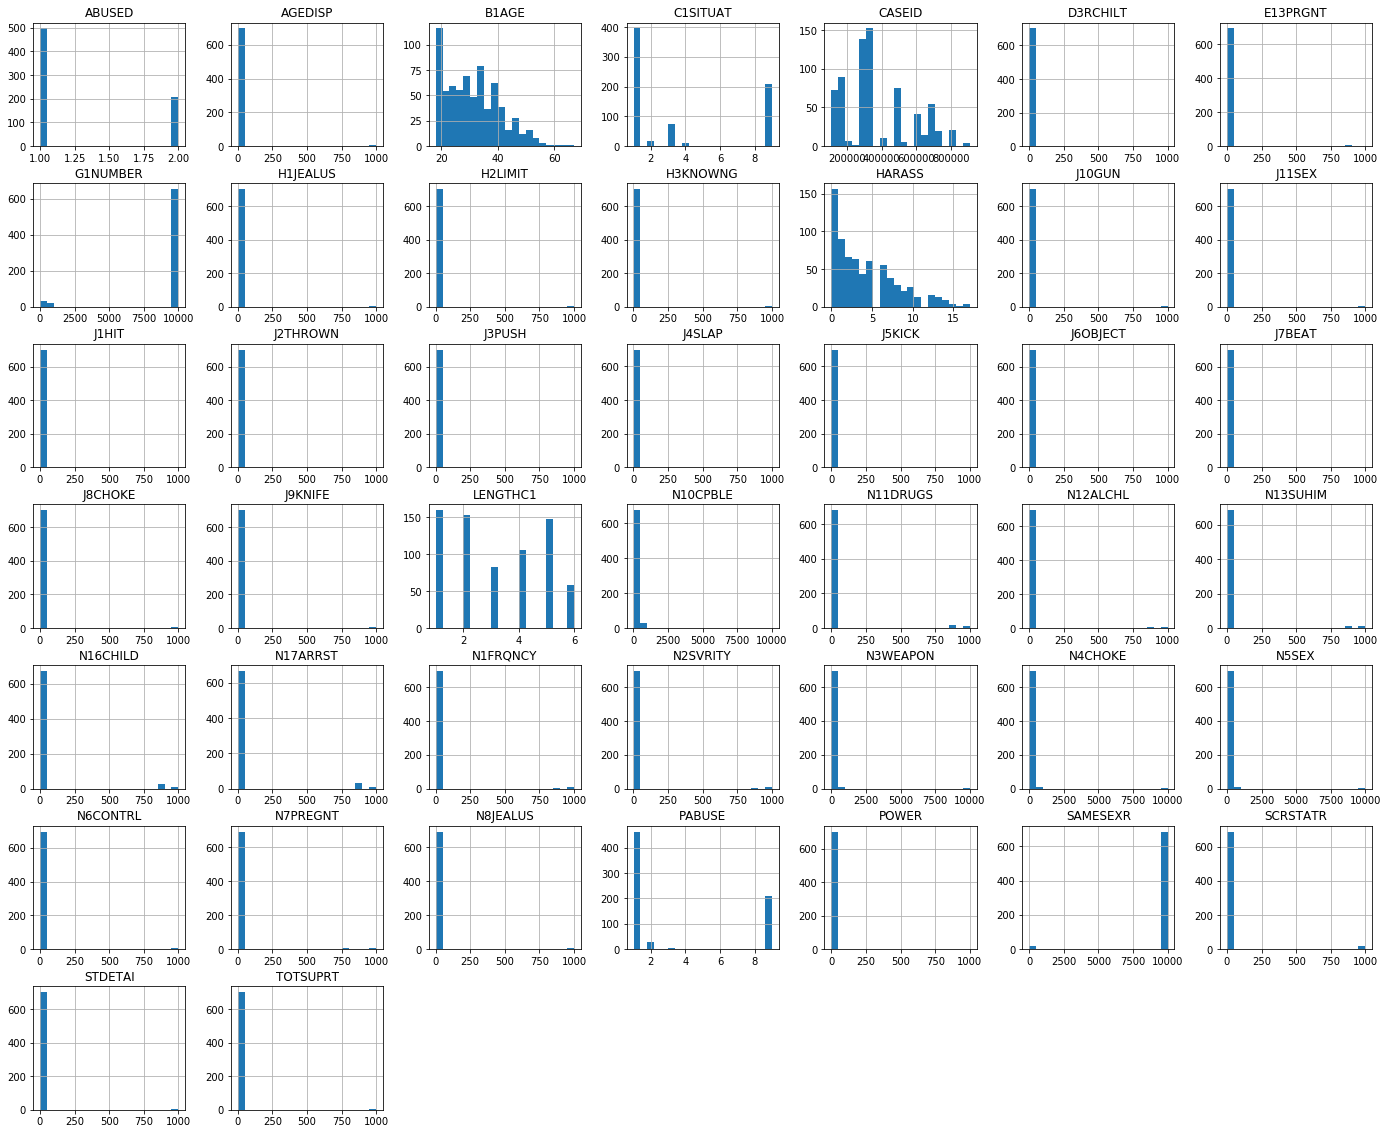

In [10]:
plot_hist(df)

In [11]:
prepare.summarize_data(df)

HEAD
   CASEID  ABUSED  SCRSTATR  LENGTHC1  C1SITUAT  PABUSE  D3RCHILT  E13PRGNT  \
0  108395       1         1         1         1       1         1         3   
1  108397       1         1         2         1       1         0         3   
2  108399       1         1         5         1       1         6         3   
3  108443       1         1         2         1       1         0         1   
4  108444       1         1         2         1       1         1         2   

   N7PREGNT  TOTSUPRT    ...     N16CHILD  N17ARRST  N1FRQNCY  N2SVRITY  \
0         2         9    ...            2         2         2         2   
1         3        11    ...            2         1         2         1   
2         2         9    ...            2         2         2         2   
3         2        12    ...            2         1         2         2   
4         2        11    ...            2         1         1         1   

   N3WEAPON  N4CHOKE  N5SEX  N6CONTRL  N8JEALUS  N10CPBLE  
0        

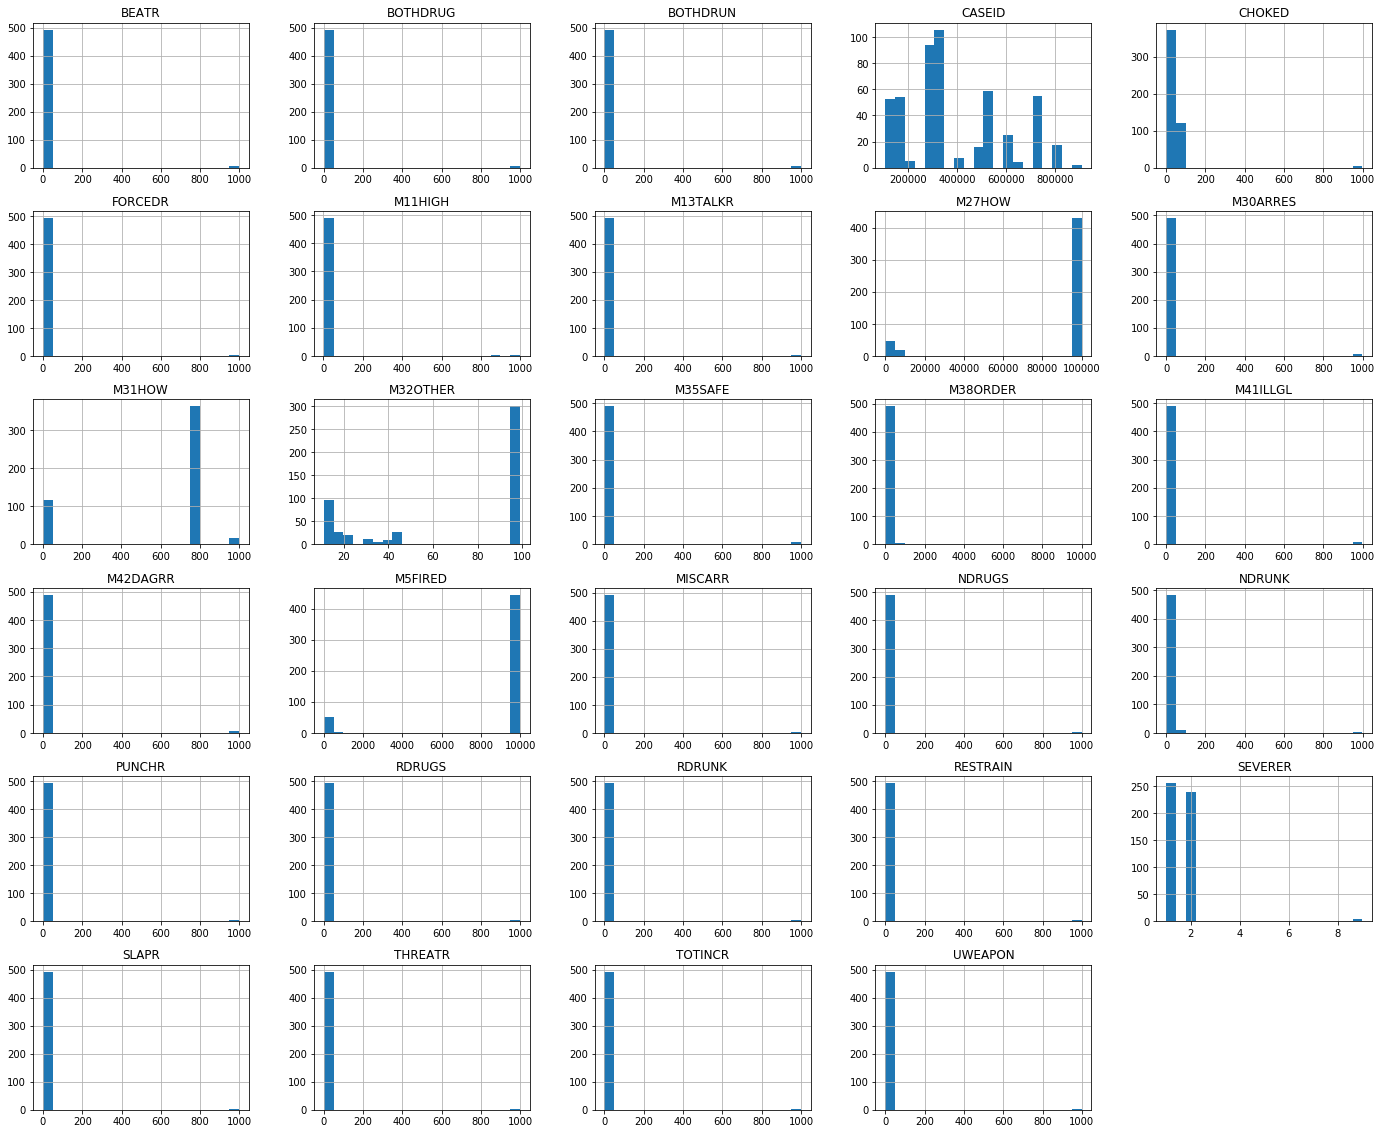

In [12]:
plot_hist(dfb)

## We will utilize the first dataframe's Case IDs to group our incident data from set 10 to group by incident and identify surveyed individuals that were victim to more than one instance of abuse

In [13]:
df['RECID'] = df.CASEID.apply(prepare.get_repeat_case)

## _This new column, RECID, is a boolean value that tells us whether the cases were re-assault cases or not._

In [14]:
# look at unaltered value counts
prepare.value_counts(df)

CASEID

-------------------------------------------------------------

ABUSED
1    497
2    208
Name: ABUSED, dtype: int64

-------------------------------------------------------------

SCRSTATR
1      455
2      118
3      115
999     17
Name: SCRSTATR, dtype: int64

-------------------------------------------------------------

LENGTHC1
1    159
2    153
3     83
4    105
5    147
6     58
Name: LENGTHC1, dtype: int64

-------------------------------------------------------------

C1SITUAT
1    395
2     18
3     74
4     10
9    208
Name: C1SITUAT, dtype: int64

-------------------------------------------------------------

PABUSE
1    464
2     27
3      6
9    208
Name: PABUSE, dtype: int64

-------------------------------------------------------------

D3RCHILT
0      339
1      136
2      113
3       57
4       32
5        9
6        9
7        5
12       1
555      1
666      1
999      2
Name: D3RCHILT, dtype: int64

-----------------------------------------------------------

In [15]:
#use prepare function to rename features 
prepare.rename_columns(df)

In [16]:
# ensure renaming of features worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 45 columns):
id                              705 non-null int64
abuse_past_year                 705 non-null int64
abuse_status                    705 non-null int64
length_relationship             705 non-null int64
partner_abusive                 705 non-null int64
num_abusers                     705 non-null int64
num_children                    705 non-null int64
pregnant                        705 non-null int64
beaten_while_pregnant           705 non-null int64
support_score                   705 non-null int64
guns_in_home                    705 non-null int64
jealous_past_year               705 non-null int64
limit_family_contact            705 non-null int64
location_tracking               705 non-null int64
threat_hit                      705 non-null int64
thrown_object                   705 non-null int64
push_shove                      705 non-null int64
slap                        

In [17]:
# create list of features
features = [col for col in df]
# drop features from this list that are perceived as primary key or continuous variables
features.remove('id')
features.remove('length_relationship')
features.remove('power_scale')
features.remove('harass_scale')
features.remove('id_age')
features.remove('reassault')

In [18]:
# split train and test
train_df, test_df = train_test_split(df, test_size=.15, random_state=123, stratify=df[['abuse_past_year']])

# EXPLORATION

### We want to eliminate the explicitly violent features (because we are modeling first on predicting abuse or no abuse), so we drop columns from the df and only select features that are not about extremely violent acts/info. Also drop the features that are 'continuous' variables. These are the harass scale, power scale, age id and the age disparity.

In [19]:
# we will refer to this list of variables as 'keep'
keep = list(df.drop(columns={'id','abuse_past_year', 'abuse_status','partner_abusive', 'num_abusers','beaten_while_pregnant','threat_hit', 'thrown_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun','rape_with_threat','threat_suicide','violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever','capable_murder'}).columns)
keep.remove('length_relationship')
keep.remove('power_scale')
keep.remove('harass_scale')
keep.remove('id_age')
keep.remove('reassault')
# add the continuous variables into their own list
continuous_vars = ['length_relationship', 'power_scale', 'harass_scale', 'id_age']

In [20]:
keep

['num_children',
 'pregnant',
 'support_score',
 'guns_in_home',
 'jealous_past_year',
 'limit_family_contact',
 'location_tracking',
 'age_disparity',
 'children_not_partner',
 'same_sex_relationship',
 'partner_drug_use',
 'partner_alcohol_use',
 'partner_reported_child_abuse',
 'partner_arrested',
 'controlled_ever',
 'jealous']

In [21]:
# we will run chi-squared tests on our categorical variables in order to get a grasp of importance
sig_feats, sig_dict = explore.get_chi_squared(train_df, keep)

support_score
Dependent (reject H0)
-----------------------
jealous_past_year
Dependent (reject H0)
-----------------------
limit_family_contact
Dependent (reject H0)
-----------------------
location_tracking
Dependent (reject H0)
-----------------------
children_not_partner
Dependent (reject H0)
-----------------------
partner_drug_use
Dependent (reject H0)
-----------------------
partner_alcohol_use
Dependent (reject H0)
-----------------------
partner_arrested
Dependent (reject H0)
-----------------------
controlled_ever
Dependent (reject H0)
-----------------------
jealous
Dependent (reject H0)
-----------------------


In [22]:
# scale continuous variables
scaler = MinMaxScaler()

scaler.fit(train_df[continuous_vars])

train_df[continuous_vars] = scaler.transform(train_df[continuous_vars])
test_df[continuous_vars] = scaler.transform(test_df[continuous_vars])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

In [33]:
continuous_vars

['length_relationship', 'power_scale', 'harass_scale', 'id_age']

In [34]:
sig_feats_continuous, sig_dict_continuous = explore.get_significant_t_tests(train_df, continuous_vars)

In [31]:
sig_dict

{'support_score': 43.892983113336896,
 'jealous_past_year': 163.99494973394587,
 'limit_family_contact': 115.89300619425505,
 'location_tracking': 149.0964968663027,
 'children_not_partner': 15.320553017528095,
 'partner_drug_use': 63.60180411747344,
 'partner_alcohol_use': 47.326440288402836,
 'partner_arrested': 55.56455583105311,
 'controlled_ever': 585.3239212814216,
 'jealous': 585.3247897736186}

In [32]:
sig_dict_continuous

{}

In [38]:
features = [item[0] for item in explore.sort_sigs(sig_dict)]

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


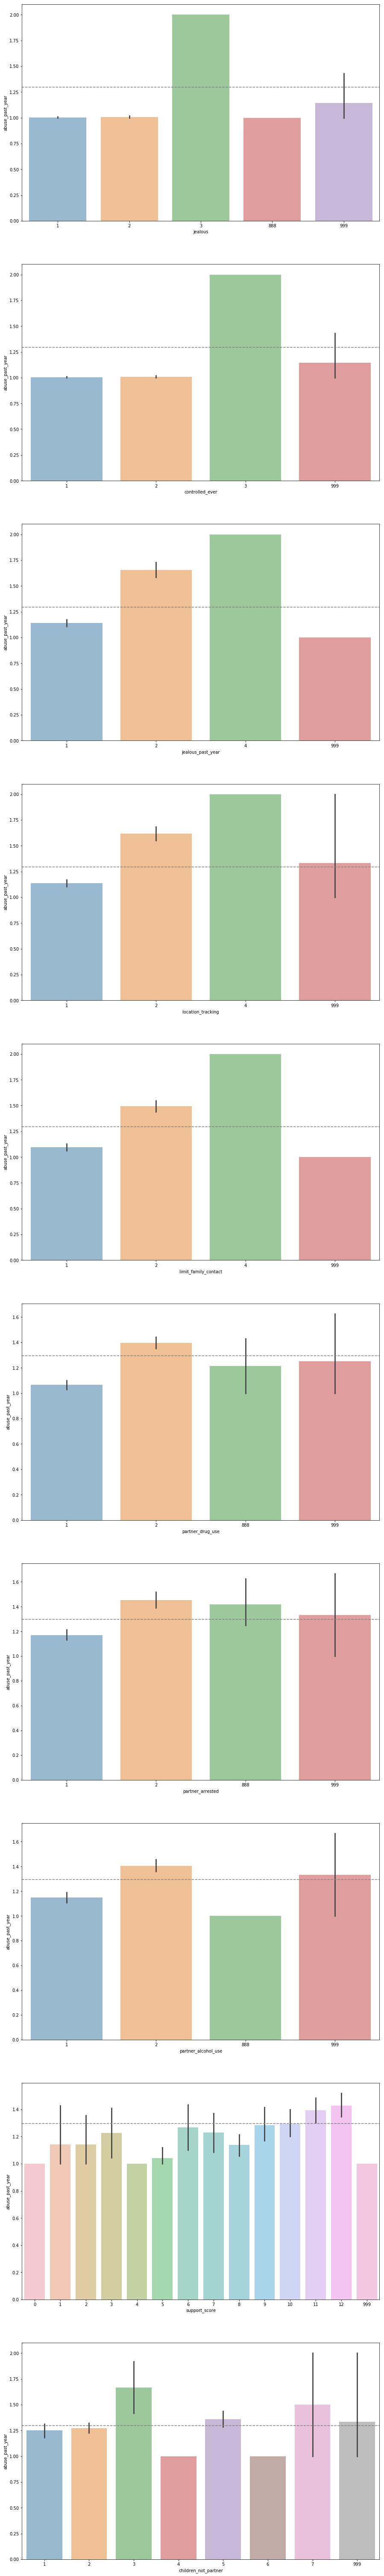

In [40]:
explore.make_bars(train_df, 'abuse_past_year', features)

## _So now we can see the cases where reassault happened. There are 350 cases out of 705. There were 497 cases of domestic violence._